In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns=['order_id'])
test = test.drop(columns=['order_id'])

In [25]:
train.head()

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0


In [26]:
train.shape

(23116, 24)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cred_sum_cc_all               23116 non-null  float64
 1   mfo_inqs_count_month          23116 non-null  int64  
 2   all_closed_creds_sum_all      23116 non-null  int64  
 3   bank_inqs_count_quarter       23116 non-null  int64  
 4   cred_max_overdue_max_ly       23116 non-null  float64
 5   all_active_creds_sum_all      23116 non-null  int64  
 6   mfo_last_days_all             23116 non-null  int64  
 7   cred_sum_cc_ly                23116 non-null  float64
 8   cred_sum_debt_all_all         23116 non-null  float64
 9   all_closed_creds_sum_ly       23116 non-null  int64  
 10  mfo_cred_mean_sum_3lm         23116 non-null  float64
 11  delay_more_sum_all            23116 non-null  int64  
 12  all_creds_count_all           23116 non-null  int64  
 13  c

Text(0.5, 1.0, 'Распределение переменной bad = {0;1}')

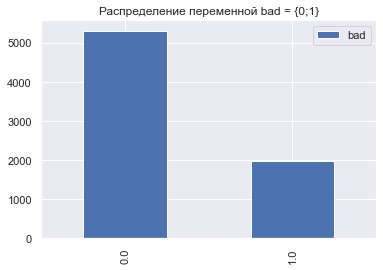

In [28]:
train['bad'].value_counts().plot(kind='bar'); plt.legend(); plt.title('Распределение переменной bad = {0;1}')

Из 7269 значений переменной bad={0;1} ~ у 2000 человек просроченный кредит.

In [29]:
features = list(set(train.columns) - set(['bad', 'approved', 'region', 'work_code']))
# Категориальные переменные region и work_code рассмотрю отдельно

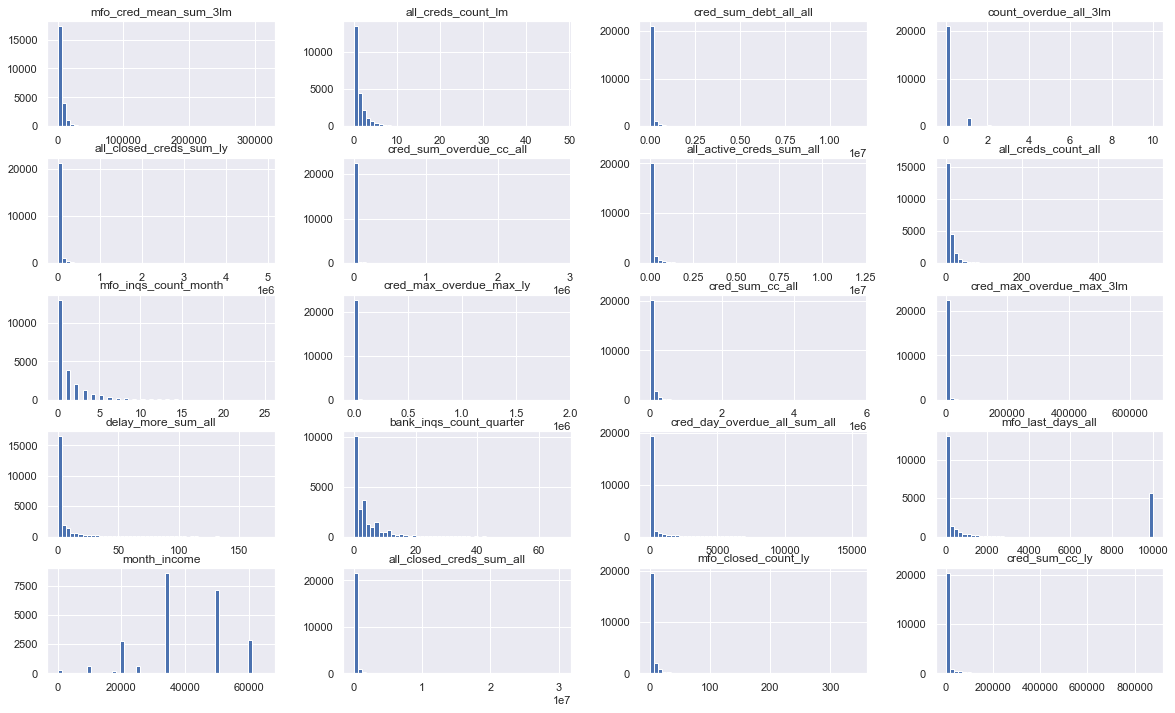

In [30]:
#All
train[features].hist(figsize=(20,12), bins=50);

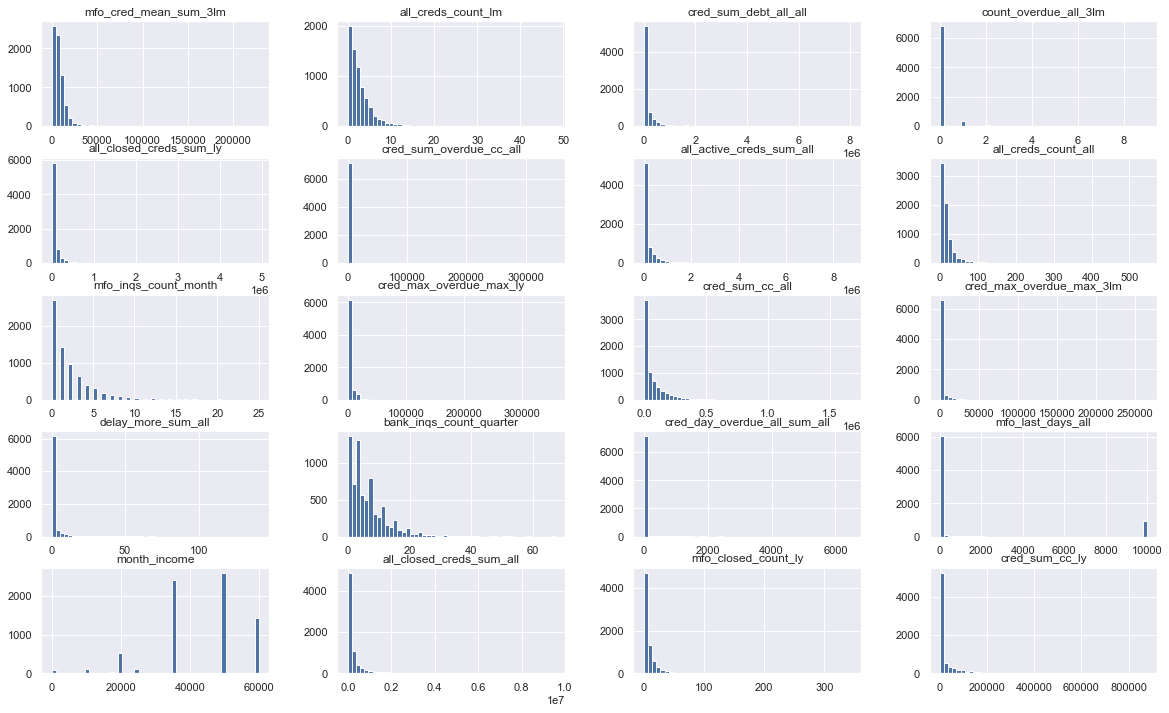

In [31]:
#Approved
train2 = train[(train.bad == 1) | (train.bad == 0)]
train2[features].hist(figsize=(20,12), bins=50);

In [32]:
df = pd.DataFrame(columns=['meanAll'
                           ,'meanApproved'
                           ,'medianAll'
                           ,'medianApproved'
                           ,'minAll'
                           ,'minApproved'
                           ,'maxAll'
                           ,'maxApproved'
                           ,'p-value(u-test)'
                           ,'id'])

for i in range(len(features)):
    df = df.append(pd.Series([train[features[i]].mean()
                              ,train2[features[i]].mean()
                              ,train[features[i]].median()
                              ,train2[features[i]].median()
                              ,train[features[i]].min()
                              ,train2[features[i]].min()
                              ,train[features[i]].max()
                              ,train2[features[i]].max()
                              ,stats.mannwhitneyu(np.array(train[features[i]]), np.array(train2[features[i]]))[1]
                              ,features[i]]
                    ,index=['meanAll','meanApproved'
                           ,'medianAll', 'medianApproved'
                           ,'minAll', 'minApproved'
                           ,'maxAll', 'maxApproved'
                           ,'p-value(u-test)', 'id'])
                    ,ignore_index=True)
    
df = df.set_index('id')

In [33]:
df

,meanAll,meanApproved,medianAll,medianApproved,minAll,minApproved,maxAll,maxApproved,p-value(u-test)
id,,,,,,,,,
mfo_cred_mean_sum_3lm,4228.567470,8057.624316,1000.0,6500.00,0.0,0.0,315200.00,227778.00,0.000000e+00
all_creds_count_lm,1.080637,2.445041,0.0,2.00,0.0,0.0,48.00,48.00,0.000000e+00
cred_sum_debt_all_all,84146.830185,186197.170845,5000.0,44360.86,0.0,0.0,11508246.66,8031534.61,0.000000e+00
count_overdue_all_3lm,0.118576,0.083093,0.0,0.00,0.0,0.0,10.00,9.00,9.784647e-12
all_closed_creds_sum_ly,30069.488190,72148.613014,0.0,24940.00,0.0,0.0,4929320.00,4929320.00,0.000000e+00
cred_sum_overdue_cc_all,4878.172179,717.309495,0.0,0.00,0.0,0.0,2878197.31,349132.88,9.968741e-60
all_active_creds_sum_all,128421.216776,229576.362086,15000.0,57330.00,0.0,0.0,12000000.00,8739115.00,0.000000e+00
all_creds_count_all,11.403876,19.070574,6.0,12.00,0.0,1.0,546.00,546.00,0.000000e+00
mfo_inqs_count_month,1.284262,2.125464,0.0,1.00,0.0,0.0,25.00,25.00,2.738596e-203


В распределениях, построенных на всей выборке, очень много нулевых значений. Эти значения оттягивают график и он становится смещенным в левую сторону. Медиана значительно меньше среднего, стандартное отклонение больше среднего и медианы. Эти признаки и визуальный анализ графиков говорят о не нормальности распределения данных. В распределениях, построенных по выборке выданных кредитов тоже наблюдаются смещения. Признаки абсолютно такие же. Для сравнения переменных двух выборок использовался непараметрический тест Манна — Уитни. P-value для всех признаков значимо меньше 0,05 => можно отвергнуть нулевую гипотезу об отсутствии различий между признаками, между переменными есть значимые различия. Использовался именно непараметрический статистический критерий, так как параметрический тест (например, Стьюдент) может плохо работать из-за ненормальности распределения данных.

* cred_sum_cc_all (Сумма кредитов по кредитным картам) - Показатель значительно больше для выборки с выданными кредитами. Это может объясняться тем, что чем более надежный клиент, тем большую сумму ему можно выдать;

* mfo_inqs_count_month (Количество запросов на кредиты в другие в МФО) - У клиентов, которые чаще обращаются за получением кредита, больше шанс его получения. У выборки выданных кредитов среднее и медианное значение больше;

* all_closed_creds_sum_all (Сумма закрытых кредитов) - Чем больше сумма закрытых кредитов, тем больше рейтинг платежеспособности клиента и больше вероятность, что он вернет кредит;

* bank_inqs_count_quarter (Количество запросов на кредиты в банки) - Аналогично mfo_inqs_count_month;

* cred_max_overdue_max_ly (Максимальная просрочка за год) - Среднее значение и максимально просроченная сумма больше у всей выборки. Чем больше просроченная сумма, тем меньше вероятность получить кредит;

* all_active_creds_sum_all (Денежная сумма всех активных кредитов) - Чем надежнее клиент, тем большую сумму ему можно выдать;

* mfo_last_days_all (Количество дней с последнего займа в МФО) - Чем меньше дней с последнего займа;

* cred_sum_cc_ly (Сумма лимитов кредитных карт, оформленных за последний год) Больше лимит => большая сумма кредитов;

* all_closed_creds_sum_ly (Сумма закрытых кредитов за последний год) - Аналогично all_closed_creds_sum_all;

* mfo_cred_mean_sum_3lm (Средняя сумма МФО кредитов, выданных за последние 3 месяца) - Аналогично all_active_creds_sum_all;

* delay_more_sum_all (Количество просрочек более чем на 90 дней по всем кредитам) - Чем надежнее клиент, тем меньше просрочек. У выборки выданных кредитов среднее значение и максимально просроченная сумма значительно меньше чем у всей выборки;

* all_creds_count_all (Общее количество кредитов) - У клиентов, которые более платежеспособны, больше взятых кредитов. На это указывают средние и медианные значения 2ух выборок;

* cred_day_overdue_all_sum_all (Суммарное количество дней просрочки текущих активных кредитов) - Аналогично delay_more_sum_all;

* cred_max_overdue_max_3lm (Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца) - Аналогично delay_more_sum_all;

* mfo_closed_count_ly (Количество закрытых МФО кредитов, взятых за последний год) - Аналогично mfo_inqs_count_month;

* cred_sum_overdue_cc_all (Сумма просрочек по кредитным картам) - Показатели, рассчитанные по всей выборке (среднее, максимальное значение) значительно больше показателей выборки выданных кредитов. Чем более ненадежный клиент, тем вероятнее он не вернет кредит;

* count_overdue_all_3lm (Количество кредитов на просрочке, взятых за последние 3 месяца);

* month_income (Доход) - Один из основных показателей в оценке платежеспособности клиента. У выборки одобренных кредитов средний и медианный доходы больше чем на всей выборке;

* all_creds_count_lm (Количество кредитов, взятых за последний месяц) - У клиентов, которые более надежны, больше выданных кредитов;


Отдельно посмотрим на признак work_code по среднему уровню дохода.

In [35]:
train.groupby(['approved', 'work_code'], as_index=True).agg({'month_income':'mean'})

month_income
approved work_code              
0        1          44253.915911
         2          41599.966398
         3          28989.019818
         4          40267.962806
         5          38537.423534
1        1          48438.576349
         2          45739.632546
         3          33468.181818
         4          45605.481728
         5          42795.797168

У госслужащих (1 категория) обоих выборок наибольшая средняя заработная плата. У выборки одобренных кредитов средняя з/п по категориям ожидаемо выше.

c:\users\miste\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\miste\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


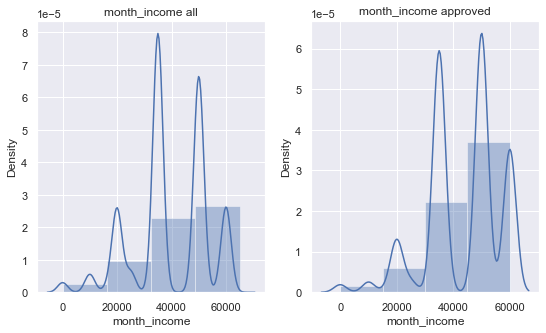

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2);

sns.distplot(train['month_income'], ax=ax[0], bins=4)
ax[0].set_title('month_income all')
sns.distplot(train2['month_income'], ax=ax[1], bins=4)
ax[1].set_title('month_income approved')
sns.set(rc={'figure.figsize':(9, 5)})

Визуализация доходов двух выборок. Как было описано выше, доход - один из основных показателей в оценке платежеспособности клиента. У выборки одобренных кредитов средний и медианный доходы больше чем на всей выборке;

Исследуем переменную bank_inqs_count_quarter (количество запросов на кредиты в банки).

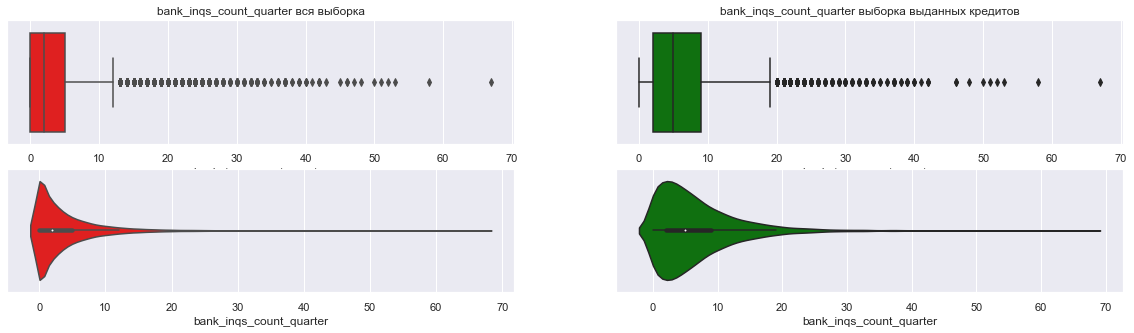

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2)

sns.boxplot(x=train.bank_inqs_count_quarter, ax=ax[0][0], color='red')
ax[0][0].set_title('bank_inqs_count_quarter вся выборка')
sns.boxplot(x=train2.bank_inqs_count_quarter, ax=ax[0][1], color='green')
ax[0][1].set_title('bank_inqs_count_quarter выборка выданных кредитов')
sns.violinplot(x=train.bank_inqs_count_quarter, ax=ax[1][0], color='red')
sns.violinplot(x=train2.bank_inqs_count_quarter, ax=ax[1][1], color='green')
sns.set(rc={'figure.figsize':(20, 5)})

По данным выборки выданных кредитов видно, что 50% наблюдений лежит в промежутке ~ от 2 до 9. Если смотреть на всю выборку целиком, то между 25 и 75 квартиртилем находится промежуток от 0 до ~ 5 => люди, которым одобрили кредит, имеют высокую активность обращения в кредитную организацию.

### Обучить модель классификации только на выданных кредитах, целевая переменная bad. 

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

l = list(train['approved'])

train = train.drop(columns=['order_id', 'region', 'approved'])
test = test.drop(columns=['order_id', 'region', 'approved'])

train_give_out_credit = train[(train.bad == 1) | (train.bad == 0)]
test_give_out_credit = test[(test.bad == 1) | (test.bad == 0)]

In [41]:
train_give_out_credit = pd.get_dummies(train_give_out_credit, 
                                      columns = ["work_code"], drop_first=True)

test_give_out_credit = pd.get_dummies(test_give_out_credit, 
                                      columns = ["work_code"], drop_first=True)

In [42]:
X_columns = train_give_out_credit.drop(columns=['bad']).columns

X_train = train_give_out_credit.drop(columns=['bad']).values
y_train = train_give_out_credit['bad'].values

X_test = test_give_out_credit.drop(columns=['bad']).values
y_test = test_give_out_credit['bad'].values

#### DecisionTreeClassifier

In [43]:
tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=35)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.7318750859815656, 0.7319034852546917)

#### Классификация методом ближайших соседей

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7391663227404045, 0.7158176943699732)

#### Логистическая регрессия

In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear")
logreg.fit(X_train, y_train)
(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

(0.729398816893658, 0.7345844504021448)

#### GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100, max_depth=3, max_features=3, random_state=23)
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

(0.7415050213234282, 0.7479892761394102)

In [47]:
score = [metrics.accuracy_score(y_test, y_pred) for y_pred in modelGB.staged_predict(X_test)]

In [48]:
best_estimator = np.argmax(score)

In [49]:
modelGB2 = GradientBoostingClassifier(n_estimators=best_estimator, max_depth=2, max_features=3, random_state=24)
modelGB2.fit(X_train, y_train)
modelGB2.score(X_train, y_train), modelGB2.score(X_test, y_test)

(0.7329756500206356, 0.7426273458445041)

In [50]:
print('train', classification_report(y_train, modelGB.predict(X_train)))
print('test', classification_report(y_test, modelGB.predict(X_test)))

train               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      5306
         1.0       0.81      0.06      0.10      1963

    accuracy                           0.74      7269
   macro avg       0.78      0.53      0.48      7269
weighted avg       0.76      0.74      0.65      7269

test               precision    recall  f1-score   support

         0.0       0.75      0.99      0.85       274
         1.0       0.78      0.07      0.13        99

    accuracy                           0.75       373
   macro avg       0.76      0.53      0.49       373
weighted avg       0.76      0.75      0.66       373



Наилучший результат среди всех моделей классификации показала первая модель на основе Градиентного Бустинга. Подбор оптимального количества деревьев в модели не показал хорошего результата. Точность и на тестовой и на обучающей выборках немного просела. На данный момент, без упора на подбор гиперпараметров модели, среди всех неансамблеых моделей я бы выбрал логистическую регрессию. У нее наилучшая точность на тестовой выборке. 

Для наилучшей модели (GradientBoosting) можно посмотреть динамику изменения переменных/переменной.

Я хочу посмотреть динамику изменения переменной, которая дает наибольший вклад в модель.

In [51]:
pd.DataFrame({'feature': X_columns,
              'importance': modelGB.feature_importances_}).sort_values('importance', ascending=False).head(5)

,feature,importance
1,mfo_inqs_count_month,0.107713
9,all_closed_creds_sum_ly,0.073911
23,work_code_5,0.066851
15,mfo_closed_count_ly,0.063666
2,all_closed_creds_sum_all,0.061740


Исследуем динамику изменени для первой по значимости переменной модели - mfo_inqs_count_month (количество запросов на кредиты в другие в МФО)

In [52]:
from pycebox.ice import ice, ice_plot

X_train_df = pd.DataFrame(X_train, columns=list(X_columns))

def predict_new(X):
    return modelGB.predict_proba(X)[:,1]

g = ice(data=X_train_df, column='mfo_inqs_count_month', predict=predict_new) 

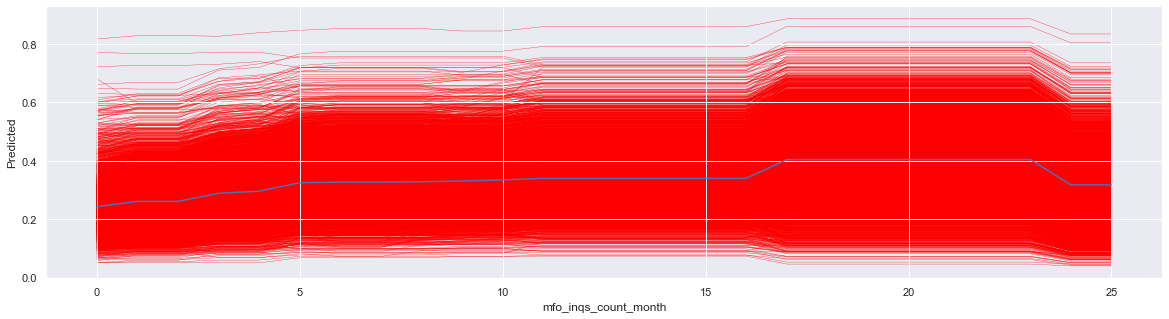

In [53]:
ice_plot(g, c='red', linewidth=0.3, plot_pdp=True)
plt.ylabel('Predicted')
plt.xlabel('mfo_inqs_count_month');

По графику можно сказать, что в среднем с увеличением количество запросов на кредиты в МФО увеличивается шанс того, что клиент не вернет выплаты по кредиту. Оценка довольно грубая. Правильнее будет сказать, что при увеличении количества обращений в МФО от ~ 17 до 23 , увеличивается шанс невозврата кредита клиентом. Также, небольшой подъем заметен в самом начале графика, от 0 до 5. Стоит отметить, что это именно интерпретация переменной модели. И в другой модели, например, в дереве, переменная может вести себя по-другому. Нужно еще смотреть на то, как переменная соотносится с реальностью.

Если нам интересно посмотреть, что повлияло на результат конкретного примера, то можно использовать LIME (можно, как вариант найти наблюдение с самой максимальной / минимальной ошибками и посмотреть, какие переменные в большей степени влияют на предсказание). Также можно использовать SHAP (как в качестве локальной, так и глобальной интерпретации).

### Придумать/найти алгоритм разметки отклоненных (bad=NaN) заявок.

Как вариант, можно сделать кластеризацию на всех элементах и потом посмотреть куда попали уже размеченные элементы. И на основе этого сделать предположения о разметке NaN значений.

In [54]:
train2 = pd.read_csv('train.csv')
train2 = train2.drop(columns=['order_id', 'region', 'approved', 'bad'])
train_all = pd.get_dummies(train2, columns = ["work_code"], drop_first=True)

In [55]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_all)

In [56]:
#Выявим оптимальное число кластеров

# SSE
sse = []
for cluster in range(1, 10):
    model = KMeans(n_clusters = cluster, random_state = 29).fit(scaled_train)
    sse.append(np.sqrt(model.inertia_))

# "Силуэт"
sil = []
for cluster in range(2, 10):
    model = KMeans(n_clusters = cluster, random_state = 8).fit(scaled_train)
    sil.append(metrics.silhouette_score(scaled_train, model.labels_))

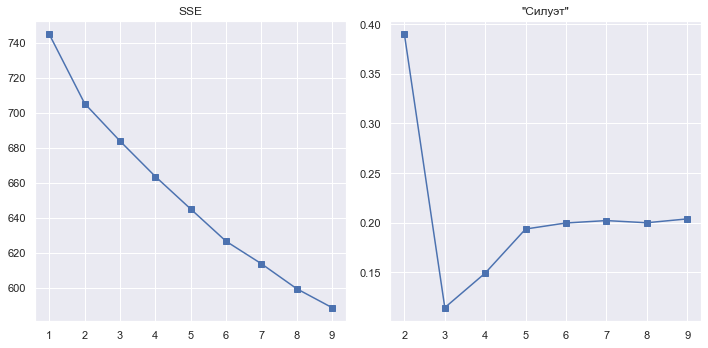

In [57]:
fig, graphic = plt.subplots(1, 2, figsize = (10, 5))

graphic[0].plot(range(1,10), sse, marker='s')
graphic[0].set_title('SSE')

graphic[1].plot(range(2,10), sil, marker='s')
graphic[1].set_title('"Силуэт"')

fig.tight_layout()

Графики показывают, что оптимально выделить 2 кластера данных. Силуэт тем лучше, чем он больше, а на графике SSE мы можем видеть перегиб в районе 2, после которого изменение остаточной суммы квадратов становится все меньше и меньше => выделяем два кластера.

In [58]:
# среднекластерные расстояния.
model = KMeans(n_clusters=2, random_state=4).fit(scaled_train)
table = train_all.copy()
table["cluster"] = model.labels_
table = table.groupby("cluster").mean()
table

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,month_income,work_code_2,work_code_3,work_code_4,work_code_5
cluster,,,,,,,,,,,,,,,,,,,,,
0,147000.291723,3.385844,653961.207642,8.510805,11600.681585,556867.911369,512.146571,40496.634538,411526.040774,151401.373943,...,4194.954378,14.675540,12011.136602,0.323833,3.834638,48407.14062,0.316943,0.077670,0.199186,0.234576
1,27780.120606,0.947448,87050.271144,2.999347,2864.153442,59755.338353,2953.165487,5892.216193,31678.737056,10623.987452,...,612.262345,1.678864,3734.993170,0.085680,0.639261,37913.74291,0.194198,0.230186,0.147267,0.351252


In [59]:
train_all['bad'] = train['bad']

train_all['bad'] = np.where((train_all.bad == 1) | (train_all.bad == 0), train_all.bad, 'nan')

* cred_sum_cc_all > у 1 кластера

* mfo_inqs_count_month > у 1 кластера

* all_closed_creds_sum_all (количество закрытых кредитов)  > у 1 кластера 

* cred_sum_cc_all ( сумма кредитов по кредитным картам) > у 1 кластера

* all_creds_count_lm	(количество кредитов взятых за последний месяц) > у 1 кластера

* month_income > у 1 кластера

* all_creds_count_lm > у 1 кластера

По этим и многим другим переменным, на  мой взгляд, можно определить, к какой группе должны принадлежать кластеры. Среднекластерные расстояния первого кластера говорят о том, люди, входящие в этот кластер вероятнее всего выплатят обязательства по кредиту.

In [60]:
i1 = table.index.get_loc(0)
l1 = np.array(table.iloc[i1]) # центроиды 1 кластера

i2 = table.index.get_loc(1)
l2 = np.array(table.iloc[i2]) # центроиды 2 клатера

bad_= []

for i in range(len(train_all['bad'])):
    if train_all.bad[i] == 'nan':
        x = np.array(train_all.iloc[train_all.index.get_loc(i)]) # i наблюдение таблицы train_all
        if sum(np.absolute(x[0:24] - l1)) <= sum(np.absolute(x[0:24] - l2)):
            bad_.append(0) # кредит возвращен
        else:
            bad_.append(1) # кредит просрочен
    else:
        bad_.append(train_all.bad[i])

In [61]:
train_all.bad = bad_
train_all.bad = train_all.bad.astype('float')

In [62]:
train_all.groupby('bad').aggregate({'bad':'count'}) 

,bad
bad,
0.0,5959
1.0,17157


In [63]:
X_columns = train_all.drop(columns=['bad']).columns

X_train = train_all.drop(columns=['bad']).values
y_train = train_all['bad'].values

Обучим модель классификации на основе градиентного бустинга на всех заявках.

In [64]:
modelGB = GradientBoostingClassifier(n_estimators=100, max_depth=3, max_features=3, random_state=23)
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

(0.8574147776431909, 0.5361930294906166)

В сравнении с моделью, обученной только на данных выданных кредитов, качество модели заметно хуже (score тестовой выборки значительно проседает по сравнению с тренировочной). Модель переобучена.